In [4]:
import numpy as np
import matplotlib.pyplot as plt
from util.plot import plot_cdf

Predicted Completion Times: (40000,)


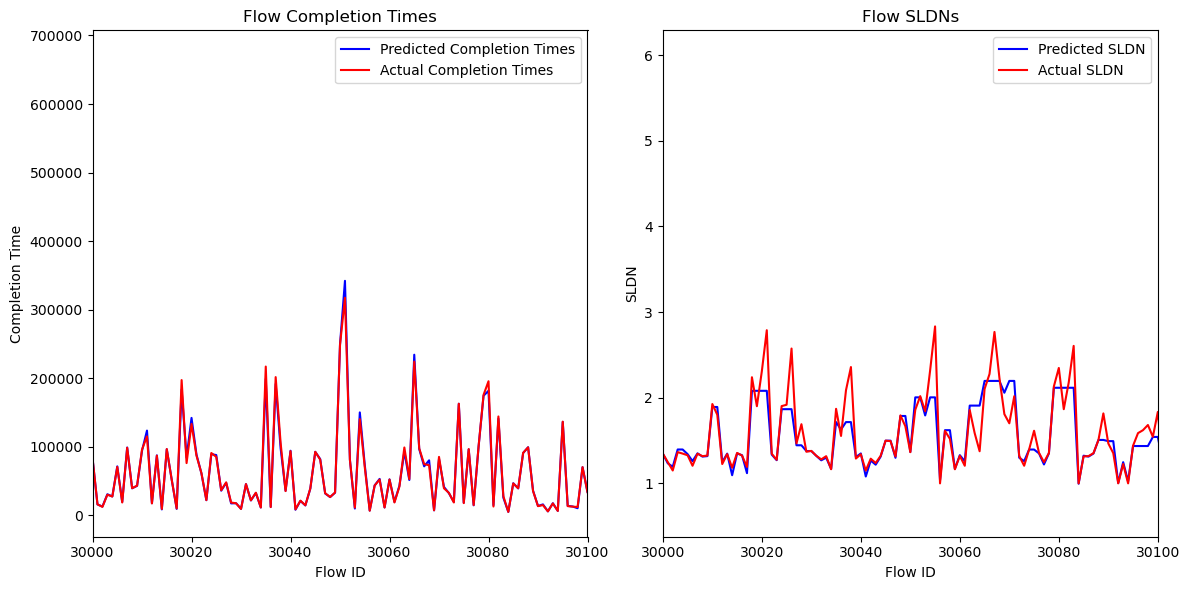

In [17]:
# Load the data from the .npz file
max_inflight_flows=6
data = np.load(f'./res/inference_{max_inflight_flows}.npz')
fct = data['fct']
sldn = data['sldn']

# Extract the data
predicted_completion_times = fct[0, :, 0].flatten()
actual_completion_times = fct[0, :, 1].flatten()
predicted_sldns = sldn[0, :, 0].flatten()
actual_sldns = sldn[0, :, 1].flatten()
print('Predicted Completion Times:', predicted_completion_times.shape)
# Plotting the completion times
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(predicted_completion_times, label='Predicted Completion Times', color='b')
plt.plot(actual_completion_times, label='Actual Completion Times', color='r')
plt.xlabel('Flow ID')
plt.ylabel('Completion Time')
plt.title('Flow Completion Times')
plt.legend()
plt.xlim(30000, 30100)

# Plotting the SLDNs
plt.subplot(1, 2, 2)
plt.plot(predicted_sldns, label='Predicted SLDN', color='b')
plt.plot(actual_sldns, label='Actual SLDN', color='r')
plt.xlabel('Flow ID')
plt.ylabel('SLDN')
plt.title('Flow SLDNs')
plt.legend()
plt.xlim(30000, 30100)
# Show the plots
plt.tight_layout()
plt.show()

Predicted Completion Times: (400000,)
Predicted Completion Times: (40000,)


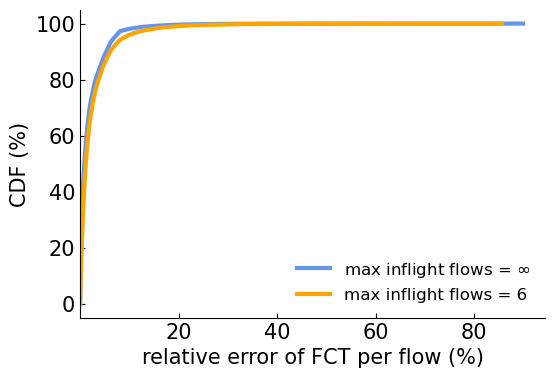

In [9]:
res_error_time=[]
res_error_sldn=[]
# max_inflight_flows_list=[0, 4, 6, 15]
max_inflight_flows_list=[0,6]
legend_list=[f'max inflight flows = {max_inflight_flows}' if max_inflight_flows!=0 else f'max inflight flows = $\infty$' for max_inflight_flows in max_inflight_flows_list]
for max_inflight_flows in max_inflight_flows_list:
    data = np.load(f'./res/inference_{max_inflight_flows}.npz')
    fct = data['fct']
    sldn = data['sldn']

    # Extract the data
    predicted_completion_times = fct[:, :, 0].flatten()
    actual_completion_times = fct[:, :, 1].flatten()
    predicted_sldns = sldn[:, :, 0].flatten()
    actual_sldns = sldn[:, :, 1].flatten()
    print('Predicted Completion Times:', predicted_completion_times.shape)
    # calculate the relative error
    relative_error_time = np.abs(actual_completion_times - predicted_completion_times) / actual_completion_times *100
    relative_error_sldn = np.abs(actual_sldns - predicted_sldns) / actual_sldns *100
    res_error_time.append(relative_error_time)
    res_error_sldn.append(relative_error_sldn)

fig_index=0
plot_cdf(
    res_error_time,
    None,
    legend_list,
    x_label="relative error of FCT per flow (%)",
    log_switch=False,
    rotate_xaxis=False,
    ylim_low=0,
    # xlim=1,
    xlim_bottom=0.001,
    fontsize=15,
    legend_font=12,
    loc=4,
    enable_abs=True,
    group_size=5,
    fig_idx=fig_index
)
fig_index=1

